# [Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is to use EDA, visualization, data cleaning and preprocesing, feature engineering, and modeling to predict house sale prices given the features of the homes, and interpret the models to find out what features add value to a home. This could guide decisions about which properties to invest in to get the most return on investment as measured by increase in sale price.

This project is based on a Kaggle competition and a dataset consisting of 79 explanatory variables describing aspects of residential homes in Ames, Iowa.

### File descriptions

train.csv - the training set

test.csv - the test set


### Data fields

 * SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
 * MSSubClass: The building class
 * MSZoning: The general zoning classification
 * LotFrontage: Linear feet of street connected to property
 * LotArea: Lot size in square feet
 * Street: Type of road access
 * Alley: Type of alley access
 * LotShape: General shape of property
 * LandContour: Flatness of the property
 * Utilities: Type of utilities available
 * LotConfig: Lot configuration
 * LandSlope: Slope of property
 * Neighborhood: Physical locations within Ames city limits
 * Condition1: Proximity to main road or railroad
 * Condition2: Proximity to main road or railroad (if a second is present)
 * BldgType: Type of dwelling
 * HouseStyle: Style of dwelling
 * OverallQual: Overall material and finish quality
 * OverallCond: Overall condition rating
 * YearBuilt: Original construction date
 * YearRemodAdd: Remodel date
 * RoofStyle: Type of roof
 * RoofMatl: Roof material
 * Exterior1st: Exterior covering on house
 * Exterior2nd: Exterior covering on house (if more than one material)
 * MasVnrType: Masonry veneer type
 * MasVnrArea: Masonry veneer area in square feet
 * ExterQual: Exterior material quality
 * ExterCond: Present condition of the material on the exterior
 * Foundation: Type of foundation
 * BsmtQual: Height of the basement
 * BsmtCond: General condition of the basement
 * BsmtExposure: Walkout or garden level basement walls
 * BsmtFinType1: Quality of basement finished area
 * BsmtFinSF1: Type 1 finished square feet
 * BsmtFinType2: Quality of second finished area (if present)
 * BsmtFinSF2: Type 2 finished square feet
 * BsmtUnfSF: Unfinished square feet of basement area
 * TotalBsmtSF: Total square feet of basement area
 * Heating: Type of heating
 * HeatingQC: Heating quality and condition
 * CentralAir: Central air conditioning
 * Electrical: Electrical system
 * 1stFlrSF: First Floor square feet
 * 2ndFlrSF: Second floor square feet
 * LowQualFinSF: Low quality finished square feet (all floors)
 * GrLivArea: Above grade (ground) living area square feet
 * BsmtFullBath: Basement full bathrooms
 * BsmtHalfBath: Basement half bathrooms
 * FullBath: Full bathrooms above grade
 * HalfBath: Half baths above grade
 * Bedroom: Number of bedrooms above basement level
 * Kitchen: Number of kitchens
 * KitchenQual: Kitchen quality
 * TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
 * Functional: Home functionality rating
 * Fireplaces: Number of fireplaces
 * FireplaceQu: Fireplace quality
 * GarageType: Garage location
 * GarageYrBlt: Year garage was built
 * GarageFinish: Interior finish of the garage
 * GarageCars: Size of garage in car capacity
 * GarageArea: Size of garage in square feet
 * GarageQual: Garage quality
 * GarageCond: Garage condition
 * PavedDrive: Paved driveway
 * WoodDeckSF: Wood deck area in square feet
 * OpenPorchSF: Open porch area in square feet
 * EnclosedPorch: Enclosed porch area in square feet
 * 3SsnPorch: Three season porch area in square feet
 * ScreenPorch: Screen porch area in square feet
 * PoolArea: Pool area in square feet
 * PoolQC: Pool quality
 * Fence: Fence quality
 * MiscFeature: Miscellaneous feature not covered in other categories
 * MiscVal: $ Value of miscellaneous feature
 * MoSold: Month Sold
 * YrSold: Year Sold
 * SaleType: Type of sale
 * SaleCondition: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

np.random.seed(42)

## 1. Load the training data 

In [2]:
house_df = pd.read_csv('../data/train.csv', index_col='Id')

In [3]:
house_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
house_df.shape

(1460, 80)

## 2. Exploratory Data Analysis

#### Check the data type of each column and if there are missing values

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

'MSSubClass' is type int64 but could be categorical

In [6]:
house_df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

Seems categorical. Change the type to object.

In [7]:
house_df['MSSubClass'] = house_df['MSSubClass'].astype('object')

#### Separate categorical and numeric variables

In [8]:
numeric_cols = ['OverallQual', 'OverallCond', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice']

In [9]:
categorical_cols = ['MSSubClass', 'MSZoning', 
                    'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MoSold']

In [10]:
categorical_df = house_df[categorical_cols]
numeric_df = house_df[numeric_cols]

In [11]:
categorical_df = categorical_df.astype('object')

In [12]:
numeric_df.dtypes

OverallQual        int64
OverallCond        int64
LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
SalePrice          int64
dtype: object

#### Plot histograms of the numeric columns. 

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


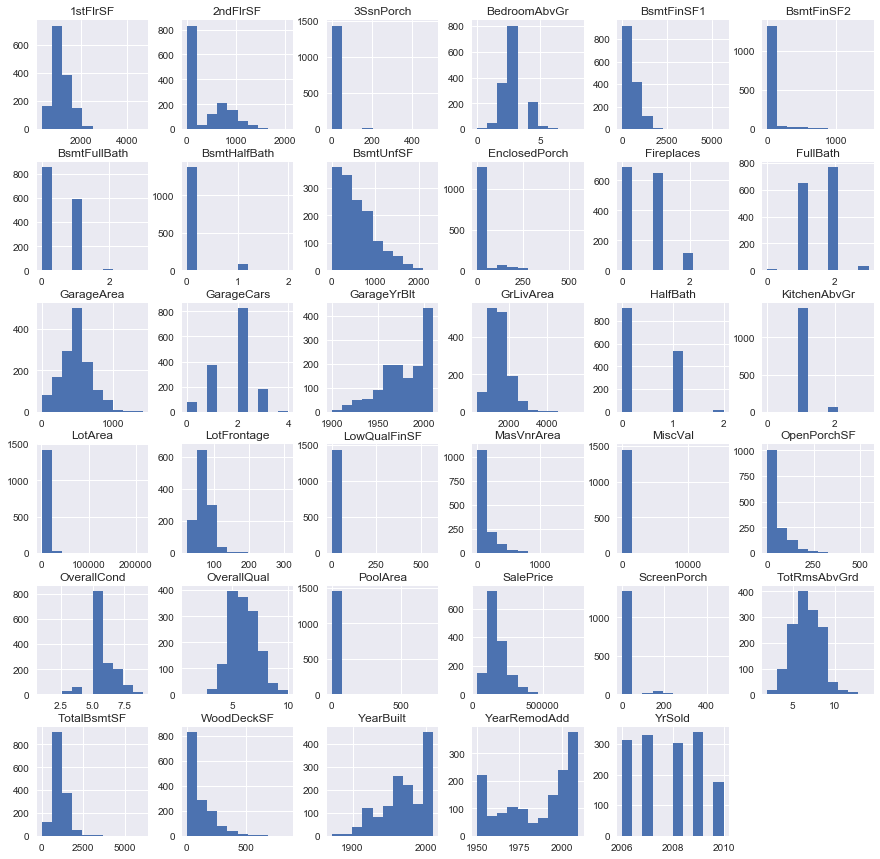

In [13]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
house_df[numeric_cols].hist(ax=ax)
fig.show()

Some of these variables are discrete (e.g. number of bedrooms or bathrooms) and some are continuous (e.g. anything dealing with square footage (SF)). There are some very skewed distributions. We will go back and deskew these after we deal with missing values.

Plot the Numeric Columns Against `SalePrice` using scatter plots.

<function matplotlib.pyplot.show>

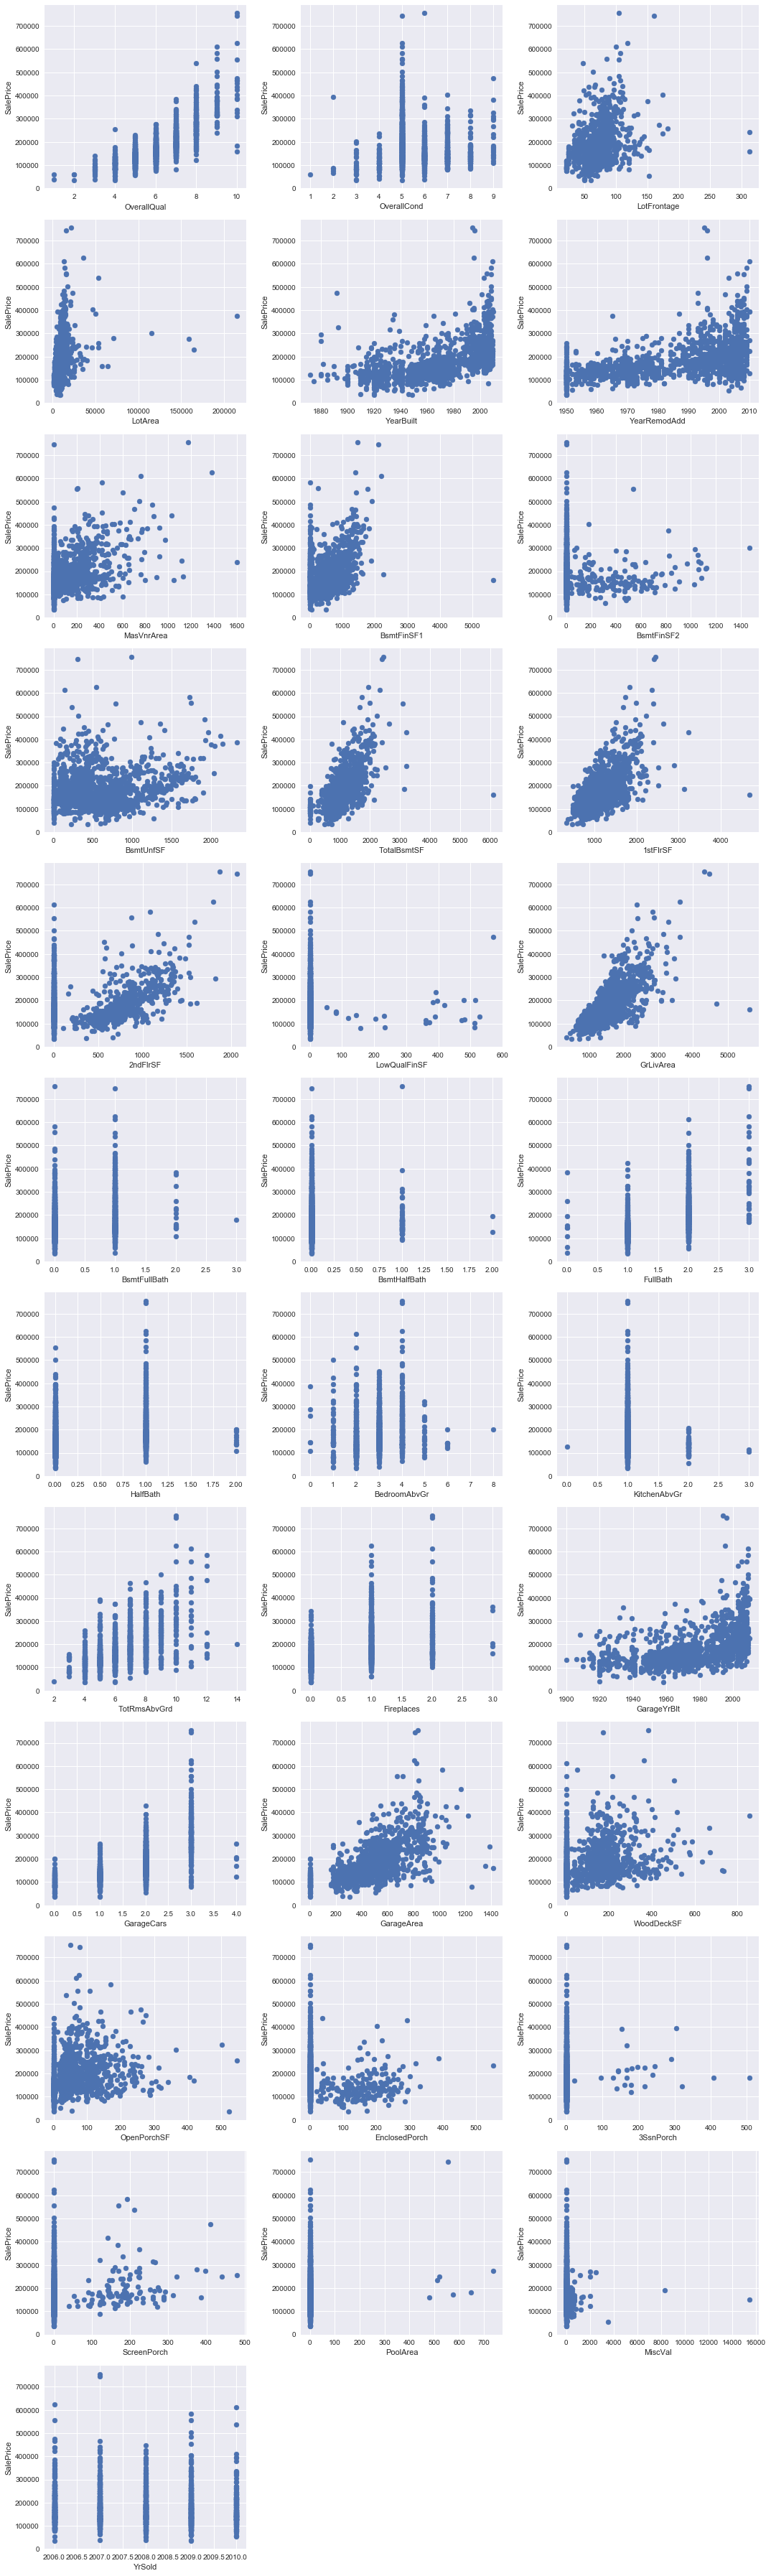

In [14]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_cols[:-1]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(house_df[col], house_df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
plt.show

Looks like there are a number of outliers that we will need to deal with. Some of the features look like they are correlated with the sale price (GrLivArea, OverallQual, various SF/area variables) and others that look completely unrelated. 

Plot categorical features against `SalePrice` with bar plots.

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


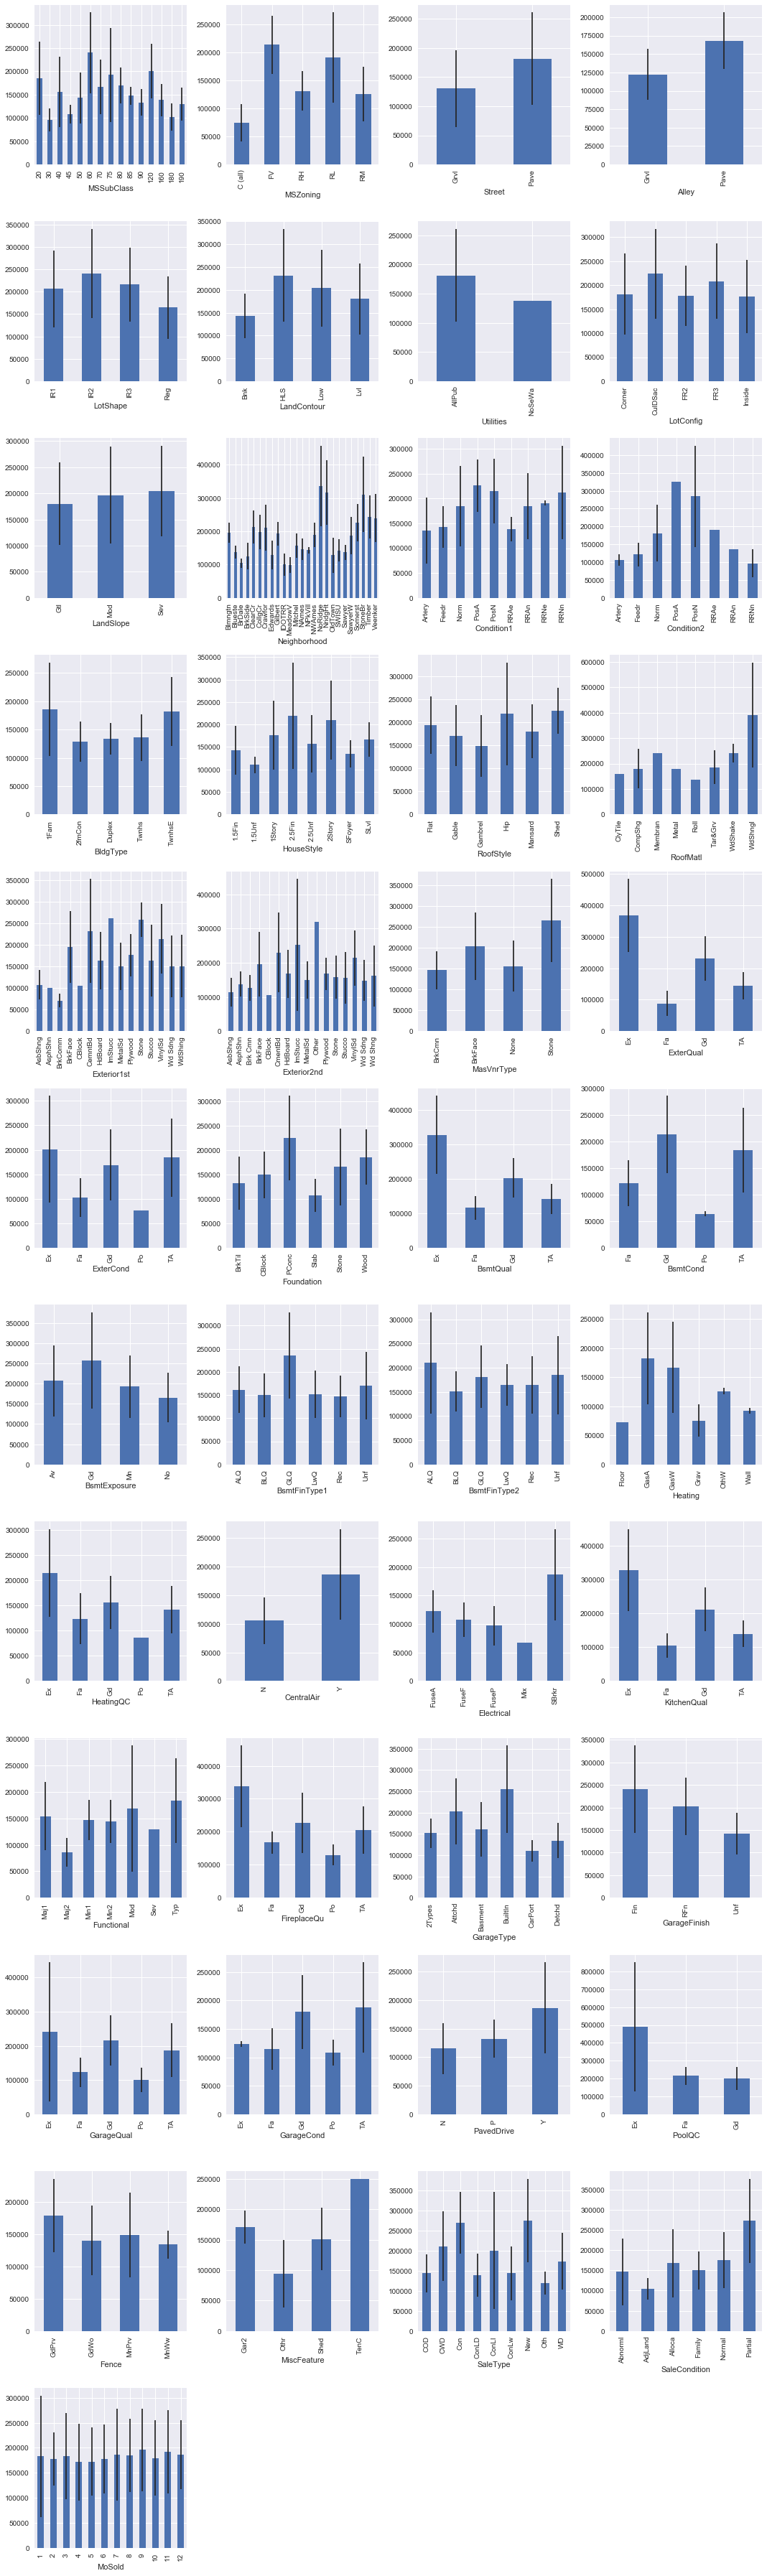

In [15]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(categorical_cols):
    fig.add_subplot(12,4,1+i)
    house_df.groupby(col).mean()['SalePrice'].plot.bar(yerr = house_df.groupby(col).std())
fig.tight_layout()
fig.show()

It looks like some of the categorical features are correlated with sale price but most are not. 

Let's do some visualization of the correlations among variables.

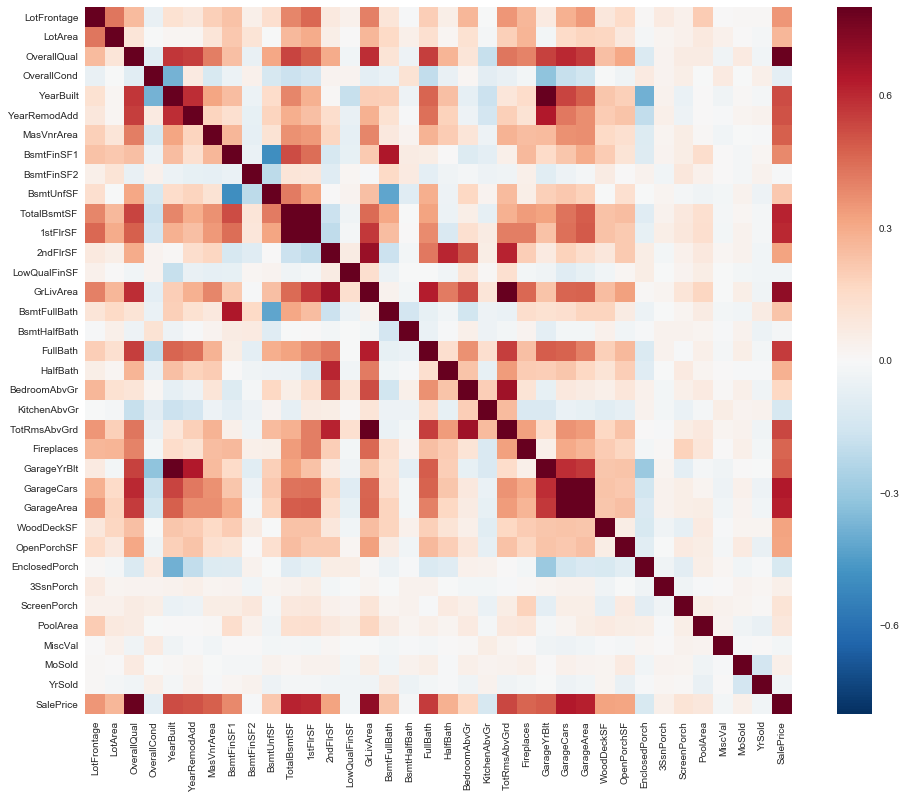

In [16]:
corrmat = house_df.corr()
f, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(corrmat, vmax=.8, square=True);

Some obvious multicolinearity shows up. The strongest postive correlations are YrBuilt and GarageYrBuilt, GarageCars and GarageArea, 1stFlrSF and TotalBsmtSF, and TotRmsAbvGr and GrLivArea. This makes sense intuitively. (Also look at SalePrice: again we see OverallQual and GrLivArea, as well as the Garage variables and TotalBsmtSF.)

## 3. Preprocessing

#### Identify and Remove Outliers

The scatter plots showed that it looks like there are a few outliers for GrLivArea, TotalBsmtSF, and 1stFlrSF. Let's remove those.

In [17]:
house_df.sort_values(by = 'GrLivArea', ascending = False)[:3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [18]:
house_df.sort_values(by = 'TotalBsmtSF', ascending = False)[:3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000


In [19]:
house_df.sort_values(by = '1stFlrSF', ascending = False)[:3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Looks like rows 1299, 497, and 524 are the outliers we're looking for

In [20]:
house_df.drop(1299, inplace=True)
house_df.drop(524, inplace=True)
house_df.drop(497, inplace=True)

In [21]:
house_df.shape

(1457, 80)

We might want to drop some outliers from SalePrice

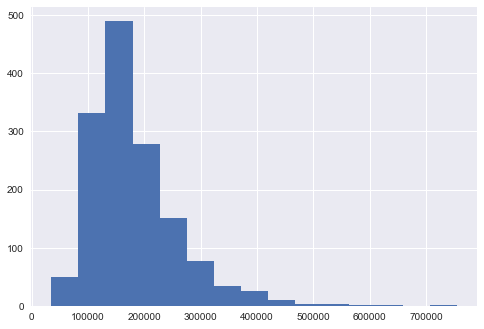

In [22]:
plt.hist(house_df['SalePrice'], bins=15)
plt.show()

In [23]:
house_df['SalePrice'].loc[house_df['SalePrice'] > 500000]

Id
179     501837
441     555000
692     755000
770     538000
804     582933
899     611657
1047    556581
1170    625000
1183    745000
Name: SalePrice, dtype: int64

Let's drop these rows where SalePrice is over $500,000

In [24]:
house_df_no_outliers = house_df[house_df['SalePrice'] < 500000]

In [25]:
house_df_no_outliers.shape

(1448, 80)

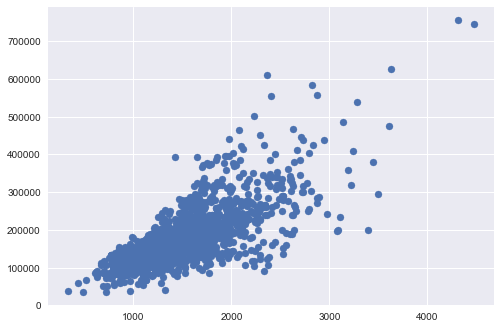

In [26]:
plt.scatter(house_df['GrLivArea'], house_df['SalePrice'])

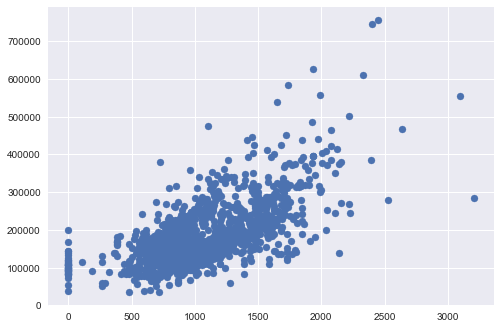

In [27]:
plt.scatter(house_df['TotalBsmtSF'], house_df['SalePrice'])

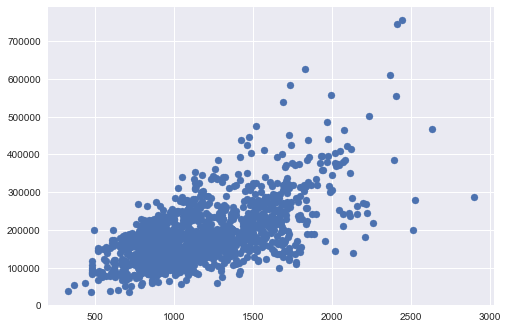

In [28]:
plt.scatter(house_df['1stFlrSF'], house_df['SalePrice'])

#### Fill missing data

In [29]:
null_cols = house_df.columns[house_df.isnull().sum() > 0]

In [30]:
house_df[null_cols].isnull().sum().sort_values(ascending=False)

PoolQC          1451
MiscFeature     1403
Alley           1366
Fence           1176
FireplaceQu      690
LotFrontage      258
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Let's drop the columns with more than 500 null values, the Garage related columns (since they are correlated strongly with the other Garage variables), and the Basement related columns (for the same reason).

In [31]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

In [32]:
house_remove_nulls = house_df.drop(cols_to_drop, axis=1)

In [33]:
house_remove_nulls.shape

(1457, 65)

Now let's replace the null values in the other columns.

In [34]:
house_remove_nulls.columns[house_remove_nulls.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical'], dtype='object')

LotFrontage: fill with median

In [35]:
house_remove_nulls['LotFrontage'] = house_remove_nulls['LotFrontage'].fillna(house_remove_nulls['LotFrontage'].median())

MasVnrType: fill with 'no feature'

In [36]:
house_remove_nulls['MasVnrType'] = house_remove_nulls['MasVnrType'].fillna('no feature')

MasVnrArea: fill with 0 as the feature is probably missing

In [37]:
house_remove_nulls['MasVnrArea'] = house_remove_nulls['MasVnrArea'].fillna(0)

In [38]:
house_remove_nulls.columns[house_remove_nulls.isnull().sum() > 0]

Index(['Electrical'], dtype='object')

Drop the one remaining row with missing value (for Electrical)

In [39]:
house_remove_nulls.dropna(inplace=True)

Verify that we have eliminated *all* the null values

In [40]:
house_remove_nulls.columns[house_remove_nulls.isnull().sum() > 0]

Index([], dtype='object')

In [41]:
house_remove_nulls.shape

(1456, 65)

#### Deskew the numeric features and SalePrice

In [42]:
from scipy.stats import skew

In [43]:
skewed_feats = house_df[numeric_cols].apply(lambda x: skew(x))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

house_df[skewed_feats] = np.log1p(house_df[skewed_feats])

Let's see if the distributions look normal

/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/emmafreeman/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


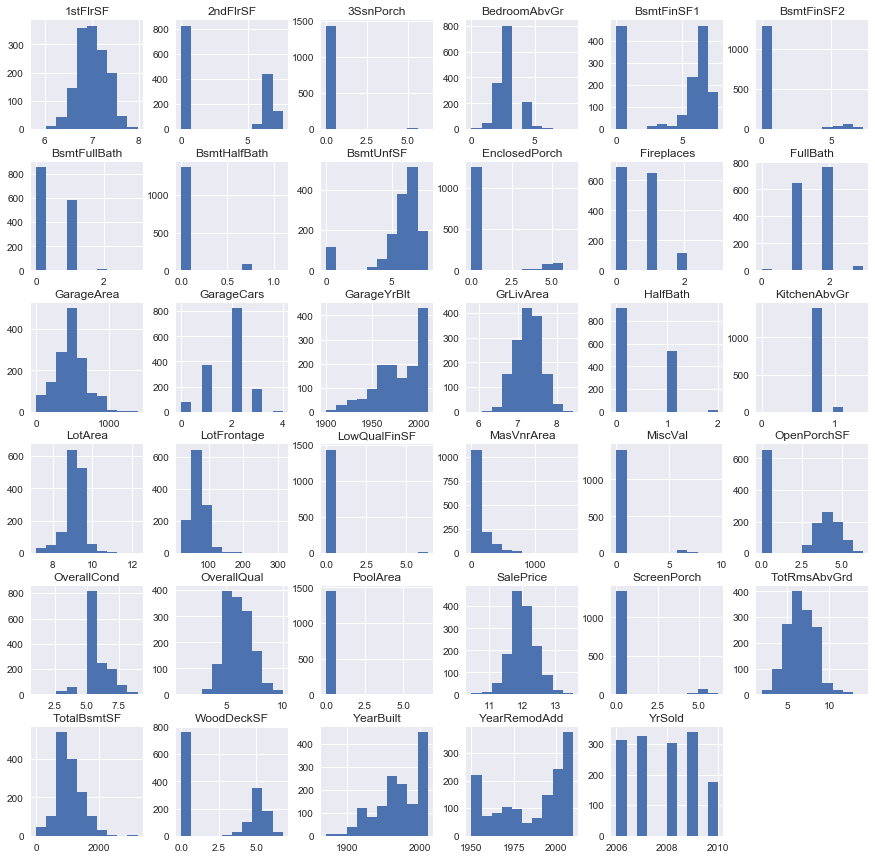

In [44]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
house_df[numeric_cols].hist(ax=ax)
fig.show()

These look more normal than they did before.

Let's see how the scatter plot of GrLivArea looks now:

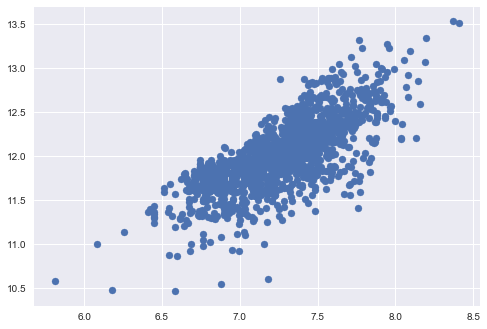

In [45]:
plt.scatter(house_df['GrLivArea'], house_df['SalePrice'])

#### Create dummy variables for categorical columns

In [46]:
house_dummies = pd.get_dummies(house_remove_nulls)

In [47]:
house_dummies.shape

(1456, 241)

#### Split the data into a train and test set.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = house_dummies.drop('SalePrice', axis=1)
y = house_dummies['SalePrice']

In [50]:
X.shape

(1456, 240)

In [51]:
y.shape

(1456,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Scale the data

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modeling


In [56]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#### Benchmarking

We need to get a basis for comparison to get a sense of what a "good" model is for this task. We'll use a basic linear regression. 

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

un-scaled data:

In [59]:
lr_raw = lr.fit(X_train, y_train)

In [60]:
lr_raw.score(X_train, y_train)

0.93415502780891924

In [61]:
lr_raw.score(X_test, y_test)

-4362740793.374568

Scaled data:

In [62]:
lr_scaled = lr.fit(X_train_scaled, y_train)

In [63]:
lr_scaled.score(X_train_scaled, y_train)

0.93297174024886531

In [64]:
lr_scaled.score(X_test_scaled, y_test)

-2.4378056112106465e+24

Interesting - our lr model does much worse on the scaled test data - because features in the raw data are on different scales so some will stand out as "informative" when they really aren't. Linear regression does poorly because of all the multicollinearity in the data.

#### Cross-validated regularization model (LassoCV)

In [65]:
from sklearn.linear_model import LassoCV

In [66]:
alphas = np.logspace(-5,5,50)

In [67]:
lassoCV = LassoCV(alphas=alphas)

In [68]:
ls = lassoCV.fit(X_train_scaled, y_train)

In [69]:
ls.score(X_train_scaled, y_train)

0.9246446765344184

In [70]:
ls.score(X_test_scaled, y_test)

0.89867849730774407

In [71]:
y_pred = ls.predict(X_train_scaled)
print(rmse(y_train, y_pred))

22463.8006722


In [72]:
y_pred = ls.predict(X_test_scaled)
print(rmse(y_test, y_pred))

22367.8883979


The RMSE gives us a metric in the same units as the data so this shows there is a ~$22,000 average difference between the predicted and actual sale price with this model - the lower RMSE the better the model predicts the target

#### Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gbr = GradientBoostingRegressor(n_estimators=400, learning_rate=.04, max_depth=4)

In [75]:
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.04, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [76]:
gbr.score(X_train_scaled, y_train)

0.99041049504643397

In [77]:
gbr.score(X_test_scaled, y_test)

0.91226471077404925

In [78]:
y_pred = gbr.predict(X_train_scaled)
print(rmse(y_train, y_pred))

8013.53912329


In [79]:
y_pred = gbr.predict(X_test_scaled)
print(rmse(y_test, y_pred))

20814.2771079


Looks a bit overfit to train data, probably need to tune hyperparameters to limit fitting

#### Select from model with LassoCV to find the most important features

In [80]:
from sklearn.feature_selection import SelectFromModel

In [81]:
sfm = SelectFromModel(ls)
sfm.fit_transform(X_train_scaled, y_train)

array([[ 0.27448798,  3.21056544, -0.10656025, ..., -0.26765437,
        -0.06063391, -0.12945956],
       [ 0.27448798, -0.15004684, -0.83383399, ..., -0.26765437,
        -0.06063391,  7.72442015],
       [-0.47561431, -0.14453764, -0.10656025, ..., -0.26765437,
        -0.06063391, -0.12945956],
       ..., 
       [ 0.52452208, -0.17759284, -0.83383399, ..., -0.26765437,
        -0.06063391, -0.12945956],
       [ 0.5745289 , -0.0883438 , -0.10656025, ..., -0.26765437,
        -0.06063391, -0.12945956],
       [-0.52562113,  0.1066819 ,  0.62071348, ..., -0.26765437,
        -0.06063391, -0.12945956]])

In [82]:
sfm.get_support().sum()

103

SFM with Lasso selected 103 features

In [83]:
lasso = sfm.get_support()

In [84]:
lasso_features = X_train.columns[lasso]

In [85]:
lasso_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       ...
       'Functional_Maj1', 'Functional_Sev', 'Functional_Typ', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Family'],
      dtype='object', length=103)

In [86]:
lasso_coefs = sfm.estimator.coef_

In [87]:
top_features = pd.DataFrame(list(zip(lasso_features, lasso_coefs)), columns = ['feature', 'importance'])
top_features.sort_values('importance', ascending=False).head(10)

,feature,importance
14,BsmtHalfBath,30466.205973
2,OverallQual,10939.218404
7,BsmtFinSF1,9744.265002
4,YearBuilt,8559.441101
10,1stFlrSF,6614.492102
96,SaleType_COD,4785.605691
89,HeatingQC_Ex,4771.272296
6,MasVnrArea,4763.841173
1,LotArea,4554.257382
3,OverallCond,4509.029235


These feature importances don't seem quite right - need to go back and look at this. Some are expected (OverallQual, YearBuilt, 1stFlrSF) but others like BsmtHalfBath don't seem like they should be that important.

### Interpreting coefficients


In [88]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

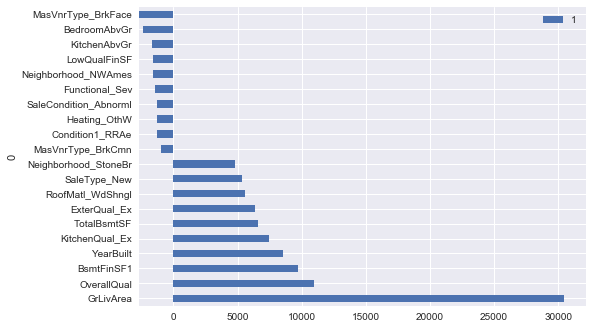

In [89]:
plot_coef(ls)

The most important feature by far is GrLivArea - the total above ground area in square feet. This is followed by overall quality, finished basement SF, year built, some other general quality and SF variables, and interestingly wood shingles on the roof.



We can use these actual coefficients to say precisely why the predicted price is what it is (how much weight each feature holds in determining the sale price). Although we log_transformed both the target and the numeric features, so we would have to map these back to the actual values.

For further improvement on this project, I would focus more on the feature engineering and selection stage to see if I could improve model performance and get better predictions. I would also try some more ensembling models and trees-based models, as well as putting the models into pipelines.